In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns



In [2]:
# sonuc = 1 diabet hastasi 
# sonuc = 0 saglikli 

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000,...,1.000,6.000,2.000,9.000,9.000,10.000,2.00,5.000,1.000,1.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000,...,106.000,190.000,88.000,170.000,89.000,101.000,122.00,121.000,126.000,93.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000,...,76.000,92.000,58.000,74.000,62.000,76.000,70.00,72.000,60.000,70.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000,...,0.000,0.000,26.000,31.000,0.000,48.000,27.00,23.000,0.000,31.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000,...,0.000,0.000,16.000,0.000,0.000,180.000,0.00,112.000,0.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000,...,37.500,35.500,28.400,44.000,22.500,32.900,36.80,26.200,30.100,30.400
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232,...,0.197,0.278,0.766,0.403,0.142,0.171,0.34,0.245,0.349,0.315
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000,...,26.000,66.000,22.000,43.000,33.000,63.000,27.00,30.000,47.000,23.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,...,0.000,1.000,0.000,1.000,0.000,0.000,0.00,0.000,1.000,0.000


In [5]:
hasta = data[data.Outcome == 1]
saglikli = data[data.Outcome == 0]

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

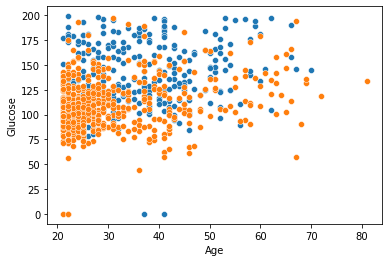

In [13]:
sns.scatterplot(data=data, x= hasta.Age, y= hasta.Glucose)
sns.scatterplot(data=data, x = saglikli.Age , y = saglikli.Glucose)

In [14]:
# x ve y eksenleri belirleme 
# mdoel sadece y kismini tahminde bulunacak 
# x kismini ise hamveri olarak kullanicagiz
y = data.Outcome.values
x_hamVeri = data.drop(["Outcome"], axis=1)

'''
normalizasyon
normalizasyon yapilmasinin nedenesi ise rakalari 0-1 ile bir aarasina sikistirmak. 
matematiksel olarak bi degisiklik olmucak ama rakamlari sikstirmassak eger cok buyuyk rakamalar cikabilir ve ve modelemizi yaniltabilir
'''
x = (x_hamVeri - np.min(x_hamVeri)) / (np.max(x_hamVeri) - np.min(x_hamVeri))

# once 
print(x_hamVeri.head())

# sonra

print(x.head())

    


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984      

In [15]:

# train ve test datamizi ayiriyoruz

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#knn
knn =KNeighborsClassifier(n_neighbors=3) # k saisini nasil belirlemeliyiz ?
knn.fit(x_train, y_train)
predic = knn.predict(x_test)

print('k = 3 degeri icin sonuclar : ', knn.score(x_test,y_test))


k = 3 degeri icin sonuclar :  0.7857142857142857


In [29]:
# k degerini kac vermeliyim 

sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train, y_train)
    print(k ,'%',round( knn_yeni.score(x_test, y_test)*100,0))
    sayac+=1

1 % 69.0
2 % 74.0
3 % 79.0
4 % 76.0
5 % 80.0
6 % 79.0
7 % 81.0
8 % 79.0
9 % 79.0
10 % 79.0


In [30]:
# 7. degerde max oran dogruluk oranini  ulasmistir 7 degereini kullanilabilri 

In [32]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_hamVeri)
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

1

In [33]:
new_prediction

array([1], dtype=int64)

In [35]:
 
new_prediction = knn.predict(sc.transform(np.array([[1,90,85,60,0,55.6,0.657,40]])))
new_prediction[0]

0